In [3]:
# !pip install lightning wandb

In [4]:
from os.path import exists
import pickle

okt_train_file = "okt_stem_train_dataset.pkl"
okt_test_file = "okt_stem_test_dataset.pkl"

if exists(okt_train_file):
    print(f"{okt_train_file} already exists")
    with open(okt_train_file, "rb") as file:
        tokenized_train_dataset = pickle.load(file)
    with open(okt_test_file, "rb") as file:
        tokenized_test_dataset = pickle.load(file)

okt_stem_train_dataset.pkl already exists


In [5]:
tokenized_train_dataset[:3]

[(['아', '더빙', '진짜', '짜증나다', '목소리'], '0'),
 (['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], '1'),
 (['너', '무재', '밓었', '다그', '래서', '보다', '추천', '한', '다'], '0')]

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.975366666666666


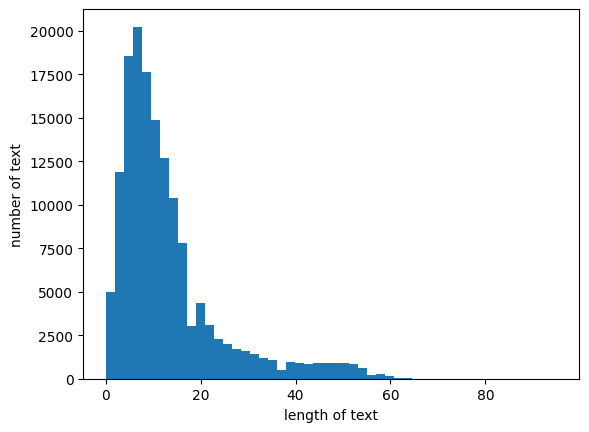

In [6]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(text) for text, _ in tokenized_train_dataset))
print('리뷰의 평균 길이 :',sum(map(lambda x: len(x[0]), tokenized_train_dataset))/len(tokenized_train_dataset))

plt.hist([len(text) for text, _ in tokenized_train_dataset], bins=50)
plt.xlabel('length of text')
plt.ylabel('number of text')
plt.show()

In [7]:
with open("kor_stopword.txt", "r") as file:
    kor_stopwords = [stopword.strip() for stopword in file.readlines()]

In [8]:
kor_stopwords = set(kor_stopwords)  # set대신 list를 사용하면 어떻게 될까?

# list가 set보다 아래 코드를 수행하는데 더 오래 걸린다.
# set, dict hash를 사용해 kor_stopwords와 비교한다.
# list는 앞에서부터 모두 탐색하기 때문에 시간이 훨씬 많이 걸린다.

In [9]:
word2vec_train_datas = []
for train_text, _ in tokenized_train_dataset:
    word2vec_train_datas.append([word for word in train_text if word not in kor_stopwords])

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 9.96158


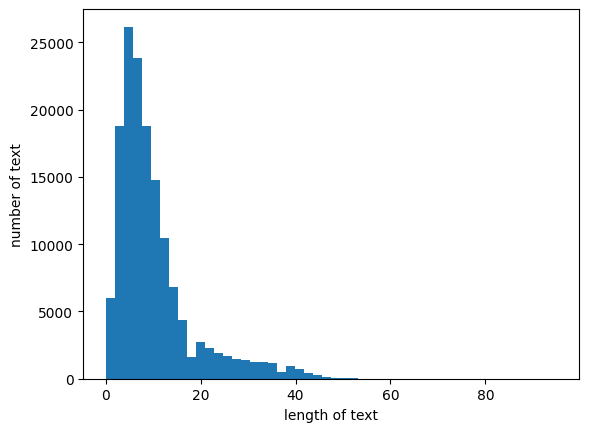

In [10]:
print('리뷰의 최대 길이 :',max(len(text) for text in word2vec_train_datas))
print('리뷰의 평균 길이 :',sum(map(len, word2vec_train_datas))/len(word2vec_train_datas))

plt.hist([len(text) for text in word2vec_train_datas], bins=50)
plt.xlabel('length of text')
plt.ylabel('number of text')
plt.show()

# 3 token 정도 평균 길이 감소

In [11]:
from gensim.models import Word2Vec

CBOW_W2V = Word2Vec(sentences = word2vec_train_datas, # Word2Vec 만들 데이터 (list 안의 list 형식)
                    vector_size = 32, # embedding 크기 (100~300)
                    window = 5, # window size
                    min_count = 1, # 최소 몇 번 나온 단어를 학습할 것인가
                    workers = 4,
                    sg = 0  # skip-gram 유무 (현재는 CBoW 사용)
)

In [12]:
print(type(CBOW_W2V.wv.vectors))
print(CBOW_W2V.wv.vectors.shape)

<class 'numpy.ndarray'>
(46927, 32)


In [13]:
print(CBOW_W2V.wv.most_similar("히어로"))

[('무협', 0.91629558801651), ('느와르', 0.9098513722419739), ('홍콩', 0.9082504510879517), ('슬래셔', 0.8970274925231934), ('sf', 0.8961548209190369), ('물의', 0.8939381241798401), ('SF', 0.8879150152206421), ('갱스터', 0.8858407735824585), ('호러', 0.885475218296051), ('최고봉', 0.8838170766830444)]


In [14]:
SkipGram_W2V = Word2Vec(sentences = word2vec_train_datas, vector_size = 32, window = 5, min_count = 1, workers = 4, sg = 1)

In [15]:
print(type(SkipGram_W2V.wv.vectors))
print(SkipGram_W2V.wv.vectors.shape)

<class 'numpy.ndarray'>
(46927, 32)


In [16]:
# Word2Vec의 가장 큰 장점
# WordVector 간 연산이 가능
# 공포영화 - 공포 = 영화
# 공포영화 - 공포 + 액션 = 액션영화
print(CBOW_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"]))
print(CBOW_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"]-CBOW_W2V.wv["공포"]))
print(CBOW_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"]-CBOW_W2V.wv["공포"]+CBOW_W2V.wv["액션"]))

[('공포영화', 0.9999999403953552), ('공포물', 0.8211469650268555), ('스릴러', 0.8120587468147278), ('공포', 0.801466166973114), ('액션영화', 0.7975417971611023), ('애니', 0.7895128726959229), ('코미디', 0.7886868119239807), ('만화', 0.7813943028450012), ('껀줄', 0.750167191028595), ('좀비', 0.7430146336555481)]
[('양리칭', 0.638297438621521), ('전영화인줄암', 0.5880306363105774), ('초집', 0.5590840578079224), ('료타', 0.5566325783729553), ('센송', 0.556538462638855), ('도인데', 0.5536670684814453), ('동예', 0.5501068830490112), ('오중', 0.5464557409286499), ('황무지', 0.5456704497337341), ('봣을뿐', 0.5427935719490051)]
[('액션', 0.8574317097663879), ('액션영화', 0.7969090342521667), ('이연걸', 0.7343515753746033), ('대환영', 0.7215016484260559), ('물', 0.7200769782066345), ('견자단', 0.7184849381446838), ('성룡', 0.7140029668807983), ('좀비', 0.6893550157546997), ('무협', 0.6648851037025452), ('지성은', 0.6613093614578247)]


In [17]:
# Skip-Gram의 액션영화 similarity가 CBOoW보다 더 높다.
# Representation이 더 잘됌!
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["공포영화"]))
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["공포영화"]-SkipGram_W2V.wv["공포"]))
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["공포영화"]-SkipGram_W2V.wv["공포"]+SkipGram_W2V.wv["액션"]))

[('공포영화', 1.0000001192092896), ('공포물', 0.9286996722221375), ('공포', 0.9137709736824036), ('호러영화', 0.8961561918258667), ('재난영화', 0.8950200080871582), ('좀비', 0.8843095898628235), ('중국영화', 0.8823308348655701), ('스릴러', 0.8822860717773438), ('sf', 0.8814981579780579), ('호러물', 0.8700117468833923)]
[('베스트', 0.5419327616691589), ('태어나다', 0.4908692538738251), ('예능', 0.4764326512813568), ('우후후', 0.4750763177871704), ('드라마', 0.46421459317207336), ('올리다', 0.4597095847129822), ('제일', 0.45929834246635437), ('첨으로', 0.45868971943855286), ('16', 0.4586782455444336), ('영화사', 0.45618051290512085)]
[('액션', 0.9023309350013733), ('액션영화', 0.8944159150123596), ('호러물', 0.8612681031227112), ('공포물', 0.8608198165893555), ('전쟁영화', 0.860684871673584), ('스타뎀', 0.8560019731521606), ('로코', 0.8550337553024292), ('블록버스터', 0.8549107313156128), ('중국영화', 0.8546753525733948), ('마블', 0.8536989688873291)]


In [18]:
print(CBOW_W2V.wv.most_similar(CBOW_W2V.wv["영화"]))
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["영화"]))
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["영화"]+SkipGram_W2V.wv["로맨스"]))

[('영화', 1.0), ('영화로', 0.7788934111595154), ('이영화', 0.7696649432182312), ('애니', 0.7509047389030457), ('독립영화', 0.7457812428474426), ('애니메이션', 0.7354757189750671), ('공포영화', 0.7296162843704224), ('다큐', 0.721735417842865), ('만화', 0.6891598701477051), ('걸', 0.6847319602966309)]
[('영화', 1.0), ('멜로영화', 0.9048118591308594), ('만화영화', 0.9035428762435913), ('독립영화', 0.899465799331665), ('인도영화', 0.8916776180267334), ('이영화', 0.8907492756843567), ('감독판', 0.8907391428947449), ('애니메이션', 0.8861271142959595), ('영활', 0.8838755488395691), ('영화로', 0.8834584355354309)]
[('로맨스', 0.9473434090614319), ('멜로', 0.9378775358200073), ('멜로영화', 0.9365219473838806), ('영화', 0.9316403269767761), ('로코', 0.9200729131698608), ('판타지', 0.9171652793884277), ('범죄영화', 0.9121582508087158), ('청춘영화', 0.9094603657722473), ('블랙코미디', 0.9082251787185669), ('로드무비', 0.9066661596298218)]


In [19]:
CBOW_W2V.save("CBOW_W2V.model")
SkipGram_W2V.save("SkipGram_W2V.model")

In [20]:
SkipGram_W2V = Word2Vec.load("SkipGram_W2V.model")

In [21]:
SkipGram_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"])

[('sf', 0.7099212408065796),
 ('공포영화', 0.7059725522994995),
 ('미국영화', 0.6975001692771912),
 ('영웅', 0.696220874786377),
 ('중국영화', 0.6934162974357605),
 ('조폭', 0.6923014521598816),
 ('느와르', 0.6895476579666138),
 ('한국영', 0.6888328790664673),
 ('헐리우드', 0.6886897683143616),
 ('판타지', 0.6815127730369568)]

In [22]:
from collections import Counter
token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

min_count = 1
vocab = {"[PAD]":0, "[UNK]":1}
vocab_idx = 2

for token, count in token_counter.items():
    if count > min_count and token not in kor_stopwords:
        vocab[token] = vocab_idx
        vocab_idx += 1

In [23]:
# W2V 클래스가 만든 Vocab 확인 -> key_to_index
print("공포영화" in SkipGram_W2V.wv.key_to_index)
print("[UNK]" in SkipGram_W2V.wv.key_to_index)
print("[PAD]" in SkipGram_W2V.wv.key_to_index)

True
False
False


In [24]:
# SkipGram의 Vocab vs. 내가 만든 vocab
# index가 다르다!
print(SkipGram_W2V.wv.key_to_index["공포영화"])
print(vocab["공포영화"])

332
2458


In [25]:
# index를 맞추는 과정
# Vocab의 규모 : W2V >>> 내가 만든 Vocab
# Vocab의 토큰이 W2V에 있으면 그 embedding을 가져온다.
# 없다면, 랜덤하게 초기화!
import numpy as np

embedding_list = []

for token, idx in vocab.items():
    if token in CBOW_W2V.wv:
        embedding_list.append(SkipGram_W2V.wv[token])
    elif token == "[PAD]":
        embedding_list.append(np.zeros(SkipGram_W2V.wv.vectors.shape[1]))
    elif token == "[UNK]":
        embedding_list.append(np.random.uniform(-1, 1, SkipGram_W2V.wv.vectors.shape[1]))
    else:
        print(token)

**PAD Token의 역할**

```Text
나는 / 자연어처리 / 강사다.
한국 / 기술 / 교육 / 대학교
```

- Token의 길이가 다르다.
- 딥러닝은 같은 길이의 matrix이면 속도가 빠르다.
- 아무 의미 없는 길이를 맞추는 Special Token인 {PAD} token을 사용한다.
- 따라서 {PAD} token은 0으로 초기화한다.

In [26]:
embedding_list[0] # PAD
# embedding_list[1] # UNK
# embedding_list[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
print(len(embedding_list))
print(len(vocab))

25958
25958


In [28]:
embedding_lookup_matrix = np.vstack(embedding_list)

In [29]:
import torch
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

In [30]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size):
        super(SentimentClassifier, self).__init__()
        # nn.Embedding(vocab_size, 32) -> vocab_size와 embedding 크기를 통해 랜덤으로 생성
        # 이제는 embedding_loopup_matrix를 만들었다.
        # freeze : embedding_layer도 학습을 할 것인가?
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_lookup_matrix), freeze=False)
        self.fc1 = nn.Linear(32 * 100, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(-1, 32 * 100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [31]:
import lightning as pl

class SentimentClassifierPL(pl.LightningModule):
    def __init__(self, sentiment_classifier):
        super(SentimentClassifierPL, self).__init__()
        self.model = sentiment_classifier
        self.loss = nn.CrossEntropyLoss()

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.save_hyperparameters()

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("val_loss", loss)
        self.validation_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_validation_epoch_end(self):
        outputs = self.validation_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_val_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("val_accuracy", accuracy)
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("test_loss", loss)
        self.test_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_test_epoch_end(self):
        outputs = self.test_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_test_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("test_accuracy", accuracy)
        self.test_step_outputs.clear()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)
        return optimizer

In [32]:
from torch.utils.data import Dataset, DataLoader

class SentimentDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        label = int(self.data[index][1])
        tokens = self.data[index][0]

        token_ids = [self.vocab[token] if token in self.vocab else 1 for token in tokens]

        if len(token_ids) > 100:
            token_ids = token_ids[:100]
        else:
            token_ids = token_ids[:100] + [0] * (100 - len(token_ids))

        return torch.tensor(token_ids), torch.tensor(label)

In [33]:
import wandb
from lightning.pytorch.loggers import WandbLogger

wandb.login()

def check_performance(vocab,train_data, test_data, wandb_log_name):
    wandb_logger = WandbLogger(project="NLP", name=wandb_log_name, group="Lec03")

    model = SentimentClassifier(len(vocab))
    pl_model = SentimentClassifierPL(model)

    train_dataset = SentimentDataset(train_data, vocab)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_dataset = SentimentDataset(test_data, vocab)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_dataset = SentimentDataset(test_data, vocab)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

    trainer = pl.Trainer(max_epochs=1,
                     accelerator="gpu",
                     logger=wandb_logger
                     )

    trainer.fit(model=pl_model,
                train_dataloaders=train_loader,
                val_dataloaders=val_loader)

    trainer.test(dataloaders=test_loader)

    wandb.finish()

wandb: Currently logged in as: noeyhesx. Use `wandb login --relogin` to force relogin


In [34]:
check_performance(vocab, tokenized_train_dataset, tokenized_test_dataset, "okt_stem_vocab_with_SKipGram")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: Fa

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.2 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.604     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.2 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.604     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP/zurgrw9a/checkpoints/epoch=0-step=2344.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP/zurgrw9a/checkpoints/epoch=0-step=2344.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at ./NLP/zurgrw9a/checkpoints/epoch=0-step=2344.ckpt
INFO:lig

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.35780075192451477    │
│       test_accuracy       │    0.8410199880599976     │
│         test_loss         │    0.35787680745124817    │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
test_accuracy,▁
test_loss,▁
train_loss,▇▆▆▄▃▅▂▃▆▆█▄▃▃▃▅▃▄▅▄▄▃▃▃▅▃█▂▄▄▂▄▆▂▇▃▂▄▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
val_accuracy,▁
val_loss,▁
avg_test_loss,0.3578
avg_val_loss,0.3578


### 실습 문제
아래는 사전 학습된 GloVe embedding을 다운로드하고 처리하는 코드이다.

glove라는 dictionary는 단어를 key로, GloVe vector를 value로 가질 때

이를 이용하여 embedding lookup matrix를 만들고 기존 사용한 모델의 embedding layer에 추가해 학습을 진행하시오.

(기존에 사용한 모델의 경우 embedding의 크기가 32이므로 glove의 크기에 맞게 수정하여야 함)

In [35]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip         # https://github.com/stanfordnlp/GloVe
# !unzip glove.6B.zip

glove_path = "glove.6B.100d.txt"

glove = {}
with open(glove_path, "r") as file:
    for line in file:
        word, *vector = line.split()
        vector = np.array(vector)
        glove[word] = vector

In [36]:
glove['the']

array(['-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172',
       '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459',
       '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231',
       '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336',
       '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971',
       '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722',
       '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397',
       '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531',
       '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477',
       '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205',
       '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167',
       '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079',
       '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044',
       '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972',
       '0.15006', '-0.53212', '

In [37]:
# File Open
with open("train.txt", "r") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    train_data = [line.split("\t") for line in lines if len(line) > 0]

with open("val.txt", "r") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    validation_data = [line.split("\t") for line in lines if len(line) > 0]

with open("test.txt", "r") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    test_data = [line.split("\t") for line in lines if len(line) > 0]

In [38]:
# !pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# Tokenizing & 불용어 처리
import re
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

tokenized_train_dataset = []
tokenized_validation_dataset = []
tokenized_test_dataset = []

for data in tqdm(train_data):
    text = re.sub(r'[,.!?;:()\"\'-_]', ' ', data[1])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    labels = data[2]
    tokenized_train_dataset.append((tokens, labels))

for data in tqdm(validation_data):
    text = re.sub(r'[,.!?;:()\"\'-_]', ' ', data[1])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    labels = data[2]
    tokenized_validation_dataset.append((tokens, labels))

for data in tqdm(test_data):
    text = re.sub(r'[,.!?;:()\"\'-_]', ' ', data[1])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    labels = data[2]
    tokenized_test_dataset.append((tokens, labels))

100%|██████████| 300/300 [00:04<00:00, 71.45it/s]


In [40]:
# Vcoabulary
from collections import Counter
token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

min_count = 1
vocab = {"[PAD]":0, "[UNK]":1}
vocab_idx = 2

for token, count in token_counter.items():
    if count > min_count:
        vocab[token] = vocab_idx
        vocab_idx += 1

In [41]:
len(vocab)

21383

In [42]:
import numpy as np

embedding_list = []

for token, idx in vocab.items():
    if token in glove:
        embedding_list.append(np.array(glove[token], dtype=float))
    elif token == "[PAD]":
        embedding_list.append(np.zeros(100))
    elif token == "[UNK]":
        embedding_list.append(np.random.uniform(-1, 1, 100))
    else:
      embedding_list.append(np.random.uniform(-1, 1, 100))

In [43]:
len(embedding_list)

21383

In [44]:
embedding_lookup_matrix = np.vstack(embedding_list)

In [50]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_lookup_matrix), freeze=True)
        self.fc1 = nn.Linear(100 * 100, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(-1, 100 * 100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [46]:
import wandb
from lightning.pytorch.loggers import WandbLogger

wandb.login()

def check_performance(vocab,train_data, val_data, test_data, wandb_log_name):
    wandb_logger = WandbLogger(project="NLP", name=wandb_log_name, group="Lec03")

    model = SentimentClassifier(len(vocab))
    pl_model = SentimentClassifierPL(model)

    train_dataset = SentimentDataset(train_data, vocab)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_dataset = SentimentDataset(val_data, vocab)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_dataset = SentimentDataset(test_data, vocab)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

    trainer = pl.Trainer(max_epochs=1,
                     accelerator="gpu",
                     logger=wandb_logger
                     )

    trainer.fit(model=pl_model,
                train_dataloaders=train_loader,
                val_dataloaders=val_loader)

    trainer.test(dataloaders=test_loader)

    wandb.finish()

In [51]:
check_performance(vocab, tokenized_train_dataset, tokenized_validation_dataset, tokenized_test_dataset, "movie_review_vocab_with_Glove")

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 3.1 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.0 M     Trainable params
2.1 M     Non-trainable params
3.1 M     Total params
12.554    Total estimated model params size (MB)
INFO:lightning.

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP/lcdul0vb/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP/lcdul0vb/checkpoints/epoch=0-step=22.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at ./NLP/lcdul0vb/checkpoints/epoch=0-step=22.ckpt
INFO:lightning

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.6856617331504822     │
│       test_accuracy       │    0.5699999928474426     │
│         test_loss         │    0.6790432929992676     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.68566
avg_val_loss,0.67342
epoch,1
